In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
file_path = 'regresi linier.csv'
data = pd.read_csv(file_path, delimiter=';', usecols=[0, 1])  
data.columns = ['Tahun', 'Jumlah kunjungan wisatawan']  
print("Data Awal:")
print(data.head()) 

Data Awal:
    Tahun  Jumlah kunjungan wisatawan
0 1964.00                   352832.00
1 1965.00                   366649.00
2 1966.00                   432937.00
3 1967.00                   476771.00
4 1968.00                   519004.00


In [23]:
data_cleaned = data.dropna(how='all')

data_cleaned['Jumlah kunjungan wisatawan'].interpolate(method='linear', inplace=True)

data_train = data_cleaned[data_cleaned['Tahun'] < 2024]
print("\nData Setelah Dibersihkan (Hingga 2023):")
print(data_train.tail())


Data Setelah Dibersihkan (Hingga 2023):
     Tahun  Jumlah kunjungan wisatawan
55 2019.00                 31882049.00
56 2020.00                  4115828.00
57 2021.00                   245862.00
58 2022.00                   383211.00
59 2023.00                 10712396.00


<ipython-input-23-664b87fd2b96>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Jumlah kunjungan wisatawan'].interpolate(method='linear', inplace=True)


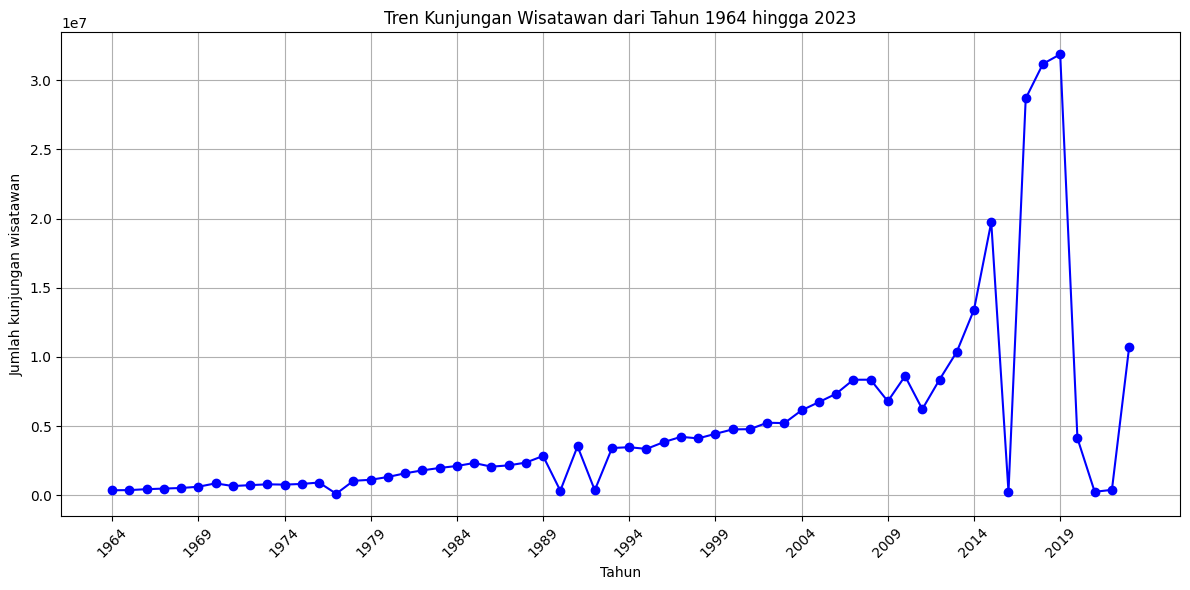

In [24]:
# Visualisasi Tren Kunjungan Wisatawan
plt.figure(figsize=(12, 6))
plt.plot(data_train['Tahun'], data_train['Jumlah kunjungan wisatawan'], marker='o', linestyle='-', color='b')
plt.title('Tren Kunjungan Wisatawan dari Tahun 1964 hingga 2023')
plt.xlabel('Tahun')
plt.ylabel('Jumlah kunjungan wisatawan')
plt.grid(True)
plt.xticks(range(int(data_train['Tahun'].min()), int(data_train['Tahun'].max()) + 1, 5), rotation=45)
plt.tight_layout()
plt.show()

In [25]:
X = data_train['Tahun'].values
y = data_train['Jumlah kunjungan wisatawan'].values

n = len(X) 
sum_x = np.sum(X)
sum_y = np.sum(y)
sum_xy = np.sum(X * y)
sum_x2 = np.sum(X ** 2)

b = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
a = (sum_y - b * sum_x) / n

print(f'Koefisien (Slope): {b}')
print(f'Intercept: {a}')

y_pred = a + b * X

Koefisien (Slope): 244943.5296749097
Intercept: -483296581.05693245


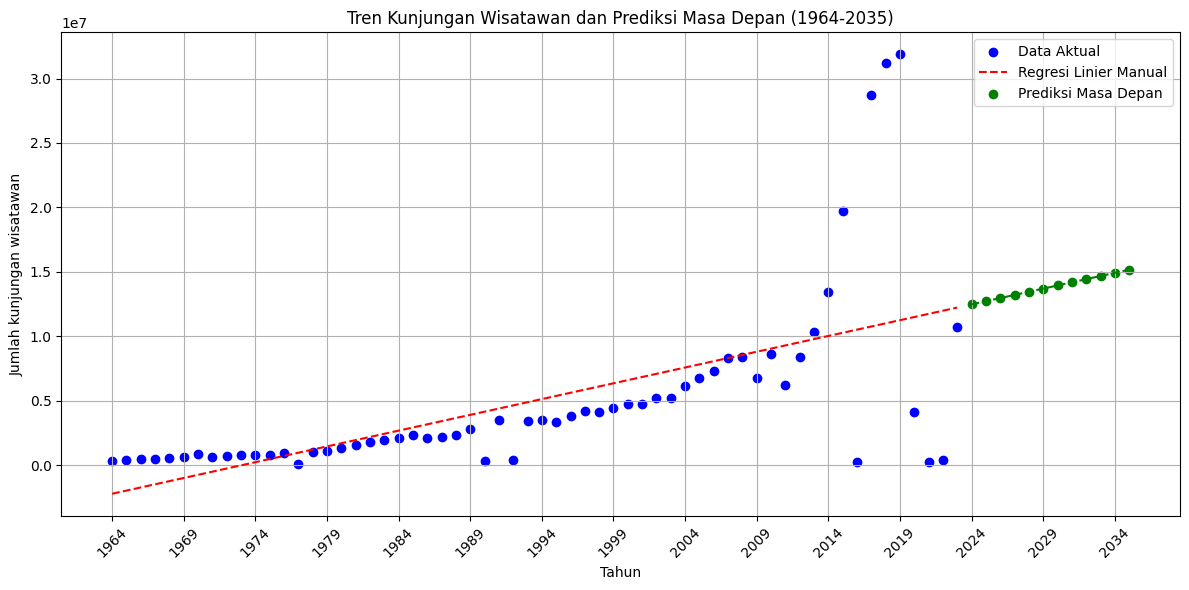


Prediksi Jumlah Kunjungan Wisatawan untuk Tahun 2024 hingga 2035:
    Tahun  Prediksi Jumlah kunjungan wisatawan
0    2024                          12469123.01
1    2025                          12714066.53
2    2026                          12959010.06
3    2027                          13203953.59
4    2028                          13448897.12
5    2029                          13693840.65
6    2030                          13938784.18
7    2031                          14183727.71
8    2032                          14428671.24
9    2033                          14673614.77
10   2034                          14918558.30
11   2035                          15163501.83


In [26]:
future_years = np.array([2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035])
future_predictions = a + b * future_years

plt.figure(figsize=(12, 6))
plt.scatter(data_train['Tahun'], data_train['Jumlah kunjungan wisatawan'], color='blue', label='Data Aktual')
plt.plot(data_train['Tahun'], y_pred, color='red', linestyle='--', label='Regresi Linier Manual')

plt.scatter(future_years, future_predictions, color='green', label='Prediksi Masa Depan')
plt.plot(future_years, future_predictions, color='green', linestyle='--')

plt.title('Tren Kunjungan Wisatawan dan Prediksi Masa Depan (1964-2035)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah kunjungan wisatawan')
plt.legend()
plt.grid(True)
plt.xticks(range(int(data_train['Tahun'].min()), 2036, 5), rotation=45)
plt.tight_layout()
plt.show()

pd.options.display.float_format = '{:.2f}'.format

future_predictions_table = pd.DataFrame({
    'Tahun': future_years,
    'Prediksi Jumlah kunjungan wisatawan': future_predictions
})
print("\nPrediksi Jumlah Kunjungan Wisatawan untuk Tahun 2024 hingga 2035:")
print(future_predictions_table)
